# UN Data Project - GDP and Internet Usage

In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [524]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


<b>How many rows and columns are in gdp_df? What are the data types of each column?</b>

In [525]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


There are 7,175 rows and 4 columns. The column data types can be seen in the above cell.

<b>Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.</b>

In [526]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


<b>How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?</b>

In [527]:
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()

# Using a lambda function to filter for countries with data for every year
countries_with_data_df = gdp_df.groupby('Country').filter(lambda x: len(x) == (max_year - min_year + 1)).nunique()
print('Number of countries with data all years: ', countries_with_data_df['Country'])

# We are defining many years as 10 or more years of data
countries_missing_data_df = gdp_df.groupby('Country').filter(lambda x: len(x) < (max_year - min_year - 10)).nunique()
print('Number of countries missing 10+ years:   ', countries_missing_data_df['Country'])

# Getting the number of observations per year
observations_per_year_df = gdp_df.groupby('Year').count()
print(observations_per_year_df['Country'])


Number of countries with data all years:  205
Number of countries missing 10+ years:    8
Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


205 countries have data reported for every year. 8 countries have missed 10 or more years. The total number of observations per year has steadily increased until 2019 and 2020 where 1 and 2 countries, respectively, did not report data.

<b>In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?</b>

Text(0.5, 1.0, 'GDP Per Capita in 2020')

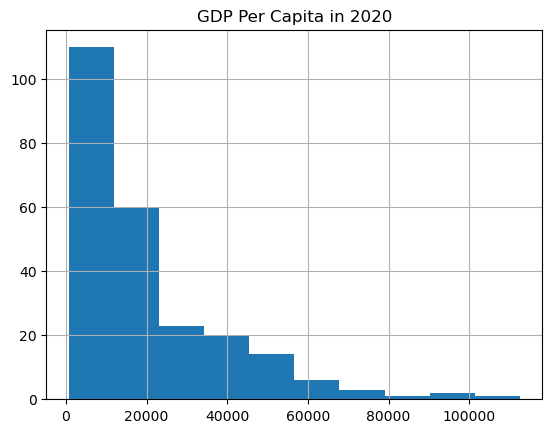

In [528]:
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

gdp_df_2020.hist('GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

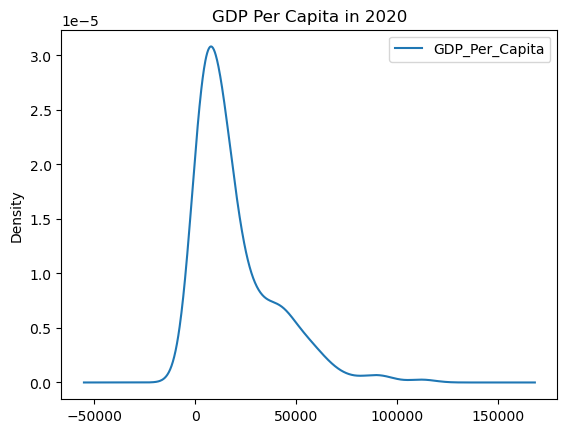

In [529]:
gdp_df_2020.plot(kind='density', x='Country', y='GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

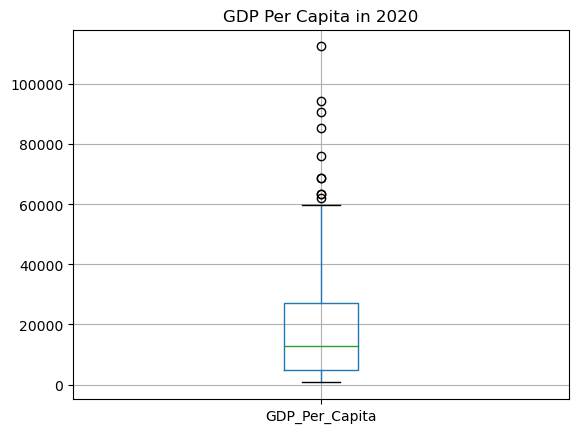

In [530]:

gdp_df_2020.boxplot('GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

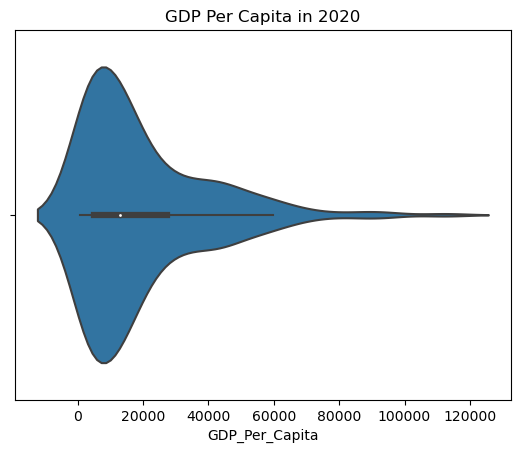

In [531]:
sns.violinplot(x='GDP_Per_Capita', data=gdp_df_2020)
plt.title('GDP Per Capita in 2020')

All of the graphs give the same information; however, the violin plot and density plot quickly show where the majority of countries reside while the box plot better defines the outliers.

<b>What was the median GDP per capita value in 2020?</b>

In [532]:
median_gdp_2020 = gdp_df_2020['GDP_Per_Capita'].median()
print('Median GDP Per Capita in 2020: $', round(median_gdp_2020, 2))

Median GDP Per Capita in 2020: $ 12908.94


<b>For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

* A boxplot
* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
* A scatterplot
* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.</b>

<Axes: title={'center': 'GDP_Per_Capita'}, xlabel='Year', ylabel='GDP Per Capita'>

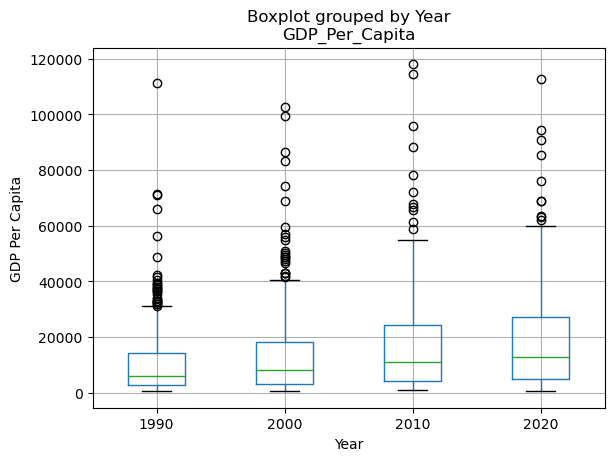

In [533]:
gdp_df_1990 = gdp_df[gdp_df['Year'] == 1990]
gdp_df_2000 = gdp_df[gdp_df['Year'] == 2000]
gdp_df_2010 = gdp_df[gdp_df['Year'] == 2010]
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

gdp_decades = pd.concat([gdp_df_1990, gdp_df_2000, gdp_df_2010, gdp_df_2020])

gdp_decades.boxplot('GDP_Per_Capita', by='Year', ylabel='GDP Per Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

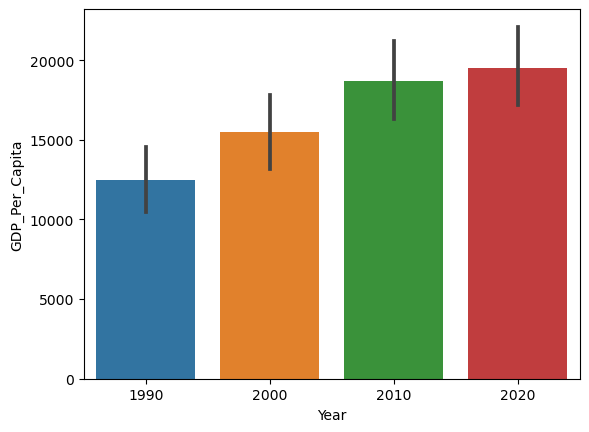

In [534]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

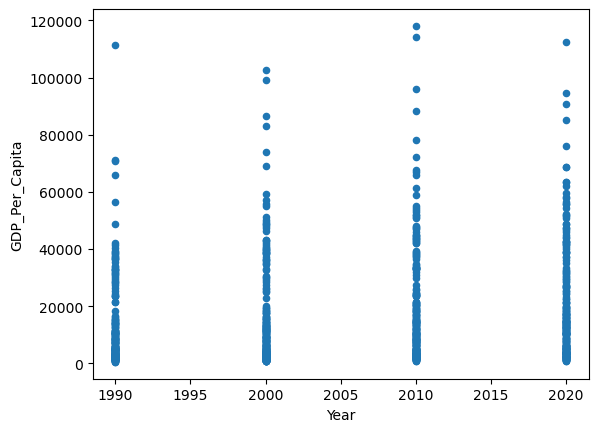

In [535]:
gdp_decades.plot.scatter(x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

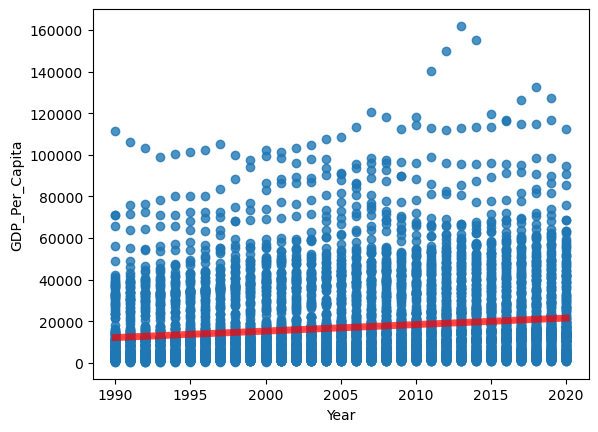

In [536]:
sns.regplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})

<b>Which country was the first to have a GDP per capita greater than $100,000?</b>

In [537]:
gdp_df_ordered_by_year_asc = gdp_df.sort_values(by=['Year', 'GDP_Per_Capita'], ascending=True)
first_country_to_achieve_10000_gdp = gdp_df_ordered_by_year_asc[gdp_df_ordered_by_year_asc['GDP_Per_Capita'] > 100000].iloc[0]
print('The first country to reach > $100,000 GDP per capita was', first_country_to_achieve_10000_gdp['Country'], 'in', first_country_to_achieve_10000_gdp['Year'], '.')

The first country to reach > $100,000 GDP per capita was United Arab Emirates in 1990 .


<b>Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.</b>

The country with the highest GDP per capita in 2020 was Luxembourg with a GDP per capita of $ 112557.31 .


Text(0.5, 1.0, 'Luxembourg GDP Per Capita 1990-2020')

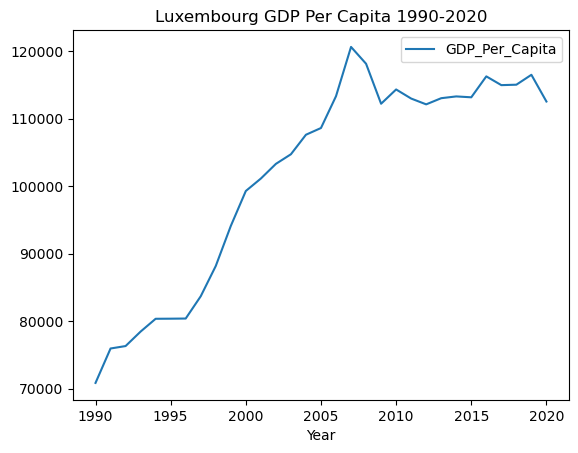

In [538]:
countries_2020_df = gdp_df[gdp_df['Year'] == 2020]
top_country_2020_df = countries_2020_df.sort_values(by='GDP_Per_Capita', ascending=False).head(1)
luxembourg_gdp_df = gdp_df[gdp_df['Country'] == 'Luxembourg']
print('The country with the highest GDP per capita in 2020 was', top_country_2020_df.iloc[0]['Country'], 'with a GDP per capita of $', round(top_country_2020_df.iloc[0]['GDP_Per_Capita'], 2), '.')
luxembourg_gdp_df.plot(kind='line', x='Year', y='GDP_Per_Capita')
plt.title('Luxembourg GDP Per Capita 1990-2020')